<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Balance_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balance Dataset

### Undersampling and Oversampling

### Data Preparation

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
census = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/census.csv')
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
census.shape

(32561, 15)

In [4]:
census.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

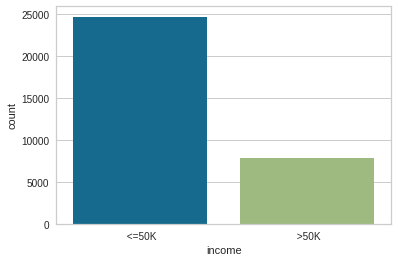

In [5]:
sns.countplot(x=census.income);

In [6]:
X_census = census.iloc[:,0:14].values
y_census = census.iloc[:,14].values

In [7]:
# label encoder
lb = LabelEncoder()
lb_work = lb
lb_education = lb
lb_marital = lb
lb_occupation = lb
lb_relationship = lb
lb_race = lb
lb_sex = lb
lb_country = lb

In [8]:
X_census[:,1] = lb_work.fit_transform(X_census[:,1])
X_census[:,3] = lb_education.fit_transform(X_census[:,3])
X_census[:,5] = lb_marital.fit_transform(X_census[:,5])
X_census[:,6] = lb_occupation.fit_transform(X_census[:,6])
X_census[:,7] = lb_relationship.fit_transform(X_census[:,7])
X_census[:,8] = lb_race.fit_transform(X_census[:,8])
X_census[:,9] = lb_sex.fit_transform(X_census[:,9])
X_census[:,13] = lb_country.fit_transform(X_census[:,13])

In [9]:
# Undersampling
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [10]:
X_under.shape, y_under.shape

((30160, 14), (30160,))

In [11]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [12]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  7841]))

In [13]:
from numpy.ma.core import remainder
# one hot encoder
one_hot = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), 
                                          [1,3,5,6,7,8,9,13])], 
                                          remainder='passthrough')

In [14]:
X_census = one_hot.fit_transform(X_census).toarray()
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [15]:
X_census.shape

(32561, 108)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_census, y_census, test_size=0.15, random_state=123)

In [17]:
X_train.shape, y_train.shape

((27676, 108), (27676,))

In [18]:
X_test.shape, y_test.shape

((4885, 108), (4885,))

In [19]:
random_forest = RandomForestClassifier(n_estimators=99 ,criterion='entropy',
                             max_depth=8,random_state=42).fit(X_train, y_train)
prediction = random_forest.predict(X_test)

In [20]:
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.8507676560900717

0.8507676560900717

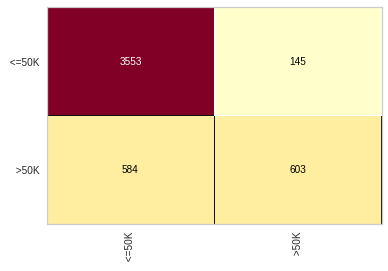

In [21]:
conf_matrix = ConfusionMatrix(random_forest).fit(X_train, y_train)
conf_matrix.score(X_test, y_test)

In [22]:
census = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/census.csv')
census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
X_census = census.iloc[:,0:14].values
y_census = census.iloc[:,14].values

In [24]:
# label encoder
lb = LabelEncoder()
lb_work = lb
lb_education = lb
lb_marital = lb
lb_occupation = lb
lb_relationship = lb
lb_race = lb
lb_sex = lb
lb_country = lb

In [25]:
X_census[:,1] = lb_work.fit_transform(X_census[:,1])
X_census[:,3] = lb_education.fit_transform(X_census[:,3])
X_census[:,5] = lb_marital.fit_transform(X_census[:,5])
X_census[:,6] = lb_occupation.fit_transform(X_census[:,6])
X_census[:,7] = lb_relationship.fit_transform(X_census[:,7])
X_census[:,8] = lb_race.fit_transform(X_census[:,8])
X_census[:,9] = lb_sex.fit_transform(X_census[:,9])
X_census[:,13] = lb_country.fit_transform(X_census[:,13])

In [26]:
# SMOTE
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [27]:
X_over.shape, X_census.shape

((49440, 14), (32561, 14))

In [28]:
y_over.shape, y_census.shape

((49440,), (32561,))

## Bellow, code memory don't supporte memory

In [29]:
# from numpy.ma.core import remainder
# # one hot encoder
# one_hot = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), 
#                                           [1,3,5,6,7,8,9,13])], 
#                                           remainder='passthrough')

In [30]:
# X_census = one_hot.fit_transform(X_over).toarray()
# X_census

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.15, random_state=123)

In [32]:
X_train.shape, y_train.shape

((42024, 14), (42024,))

In [33]:
X_test.shape, y_test.shape

((7416, 14), (7416,))

In [34]:
random_forest = RandomForestClassifier(n_estimators=99 ,criterion='entropy',
                             max_depth=8,random_state=42).fit(X_train, y_train)
prediction = random_forest.predict(X_test)

In [35]:
y_pred = random_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.8847087378640777

0.8847087378640777

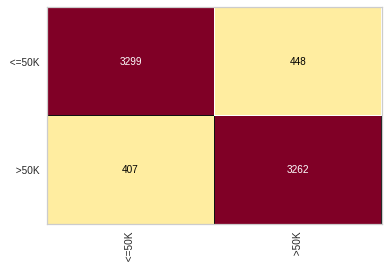

In [36]:
conf_matrix = ConfusionMatrix(random_forest).fit(X_train, y_train)
conf_matrix.score(X_test, y_test)

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.88      0.89      3747
        >50K       0.88      0.89      0.88      3669

    accuracy                           0.88      7416
   macro avg       0.88      0.88      0.88      7416
weighted avg       0.88      0.88      0.88      7416

